In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
from matplotlib.legend_handler import HandlerTuple
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import math
import os

In [3]:
PATH = "../data/finals_all_0106"

files = os.listdir(PATH)
files = [x for x in files if 'csv' in x]

In [4]:
file_data = []
diff_means = []
diff_program_means_dict = {'none': [], 'windup': [], 'getpixel': [], 'bitblt': [], 'getdbits': []}
for file in files:
    data_in = pd.read_csv(f"{PATH}/{file}", index_col=False)
    try:
        mean = data_in.query("fw != -1 & diff > 0")['diff'].mean()
        if not math.isnan(mean):
            diff_means.append(mean)
            diff_program_means_dict[data_in['program'][1]].append(mean)
    except:
        #print(data_in, file)
        pass
    file_data.append(data_in)
    
data = pd.concat(file_data)

In [5]:
data_default = data[data['complexity'] == 'default']
data_default_fs = data_default[data_default['fullscreen'] == 'fullscreen']
data_default_nfs = data_default[data_default['fullscreen'] == 'no_fullscreen']
data_default_large = data_default[data_default['fullscreen'] == 'large']
data_default_small = data_default[data_default['fullscreen'] == 'small']

(0.0, 25000.0)

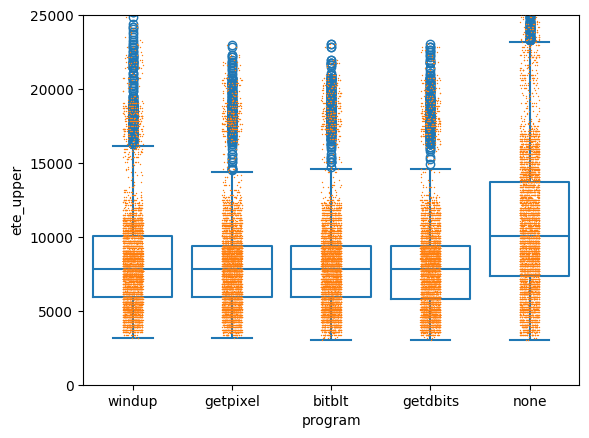

In [11]:
plot = sns.boxplot(data=data_default_fs, x='program', y='ete_upper', order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], fill=False)
plot = sns.stripplot(data=data_default_fs, x='program', y='ete_upper', order=['windup', 'getpixel', 'bitblt', 'getdbits', 'none'], size=1)
plot.axes.set_ylim(0, 25000)